In [ ]:
!apt-get update

# Part 1: Convolutional Neural Networks

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# TODO: Determine good hyperparameters
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 30

# Data Transformations
transform = transforms.Compose([
    # TODO: Define data transformations
    # - Convert images (transforms) to tensors
    # - Normalize pixel values from [0,1] to [-1,1] for better training stability
    transforms.ToTensor(),
    transforms.Normalize(mean = 0.5, std = 0.5)
])

In [ ]:
# Load Fashion-MNIST Dataset with the transformations defined above
train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

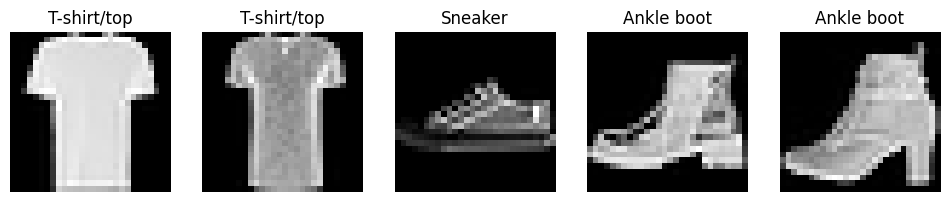

In [ ]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

num_images = 5
fig, axes = plt.subplots(1, num_images, figsize=(12, 3))

for i in range(num_images):
    img = images[i].squeeze().numpy()
    label = class_names[labels[i].item()]

    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(label)
    axes[i].axis("off")

plt.show()

In [ ]:
# Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        # TODO: Define the layers of the CNN model
        # - The super class is initialized
        # - Use LeNet or AlexNet as an example for designing the layers
        # - Use conv2d for convolutional layers
        super().__init__()
        self.conv1 = nn.Conv2d (1,6,5)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(6*12*12, 10)

    def forward(self, x):
        # TODO: Implement the forward pass
        x = self.conv1(x)
        x = self.pool(self.relu(x))
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        return x


# Initialize Model
model = CNN().to(device)

# TODO: Define a good Loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),LEARNING_RATE )

In [ ]:
# Training Loop
print("Training model...")
for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # TODO: Implement the training step
        # - Reset the optimizer's gradients to avoid accumulation
        # - Perform a forward pass to get model predictions
        # - Compute the loss using the criterion
        # - Backpropagate the loss to compute gradients
        # - Update model parameters using the optimizer
        # - Accumulate the loss for tracking the epoch's loss
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss/len(train_loader):.4f}")

Training model...
Epoch 1/30, Loss: 0.4898
Epoch 2/30, Loss: 0.3637
Epoch 3/30, Loss: 0.3312
Epoch 4/30, Loss: 0.3116
Epoch 5/30, Loss: 0.2992
Epoch 6/30, Loss: 0.2877
Epoch 7/30, Loss: 0.2794
Epoch 8/30, Loss: 0.2725
Epoch 9/30, Loss: 0.2663
Epoch 10/30, Loss: 0.2619
Epoch 11/30, Loss: 0.2577
Epoch 12/30, Loss: 0.2547
Epoch 13/30, Loss: 0.2526
Epoch 14/30, Loss: 0.2485
Epoch 15/30, Loss: 0.2464
Epoch 16/30, Loss: 0.2438
Epoch 17/30, Loss: 0.2412
Epoch 18/30, Loss: 0.2409
Epoch 19/30, Loss: 0.2376
Epoch 20/30, Loss: 0.2380
Epoch 21/30, Loss: 0.2348
Epoch 22/30, Loss: 0.2344
Epoch 23/30, Loss: 0.2313
Epoch 24/30, Loss: 0.2313
Epoch 25/30, Loss: 0.2301
Epoch 26/30, Loss: 0.2287
Epoch 27/30, Loss: 0.2275
Epoch 28/30, Loss: 0.2259
Epoch 29/30, Loss: 0.2269
Epoch 30/30, Loss: 0.2251


In [ ]:
# Run evaluation
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8911


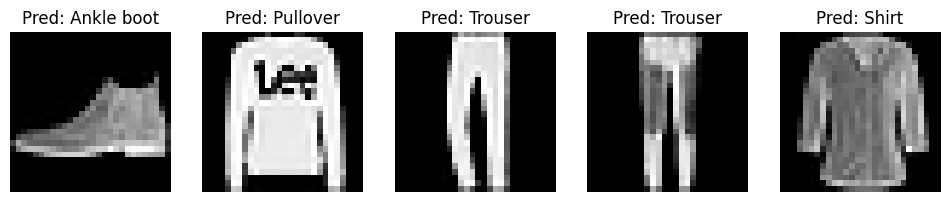

In [ ]:
# Visualizing predicted results
data_iter = iter(test_loader)
images, labels = next(data_iter)

images = images.to(device)

model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

num_images = 5
fig, axes = plt.subplots(1, num_images, figsize=(12, 3))

for i in range(num_images):
    img = images[i].cpu().squeeze().numpy()
    predicted_label = class_names[predicted[i].item()]
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(f"Pred: {predicted_label}")
    axes[i].axis("off")

plt.show()

# Part 2: Recurrent Neural Networks

In [ ]:
# necessary imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from collections import Counter
from datasets import load_dataset
import numpy as np
import re

# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Load IMDb dataset
print("Loading IMDb dataset...")
dataset = load_dataset("imdb")

# Extract train and test splits
X_train = dataset["train"]["text"]
y_train = [1 if label == 1 else 0 for label in dataset["train"]["label"]]
X_test = dataset["test"]["text"]
y_test = [1 if label == 1 else 0 for label in dataset["test"]["label"]]

# Note: X contains the text data, y contains the labels (0 for negative sentiment, 1 for positive sentiment)

print(f"Loaded {len(X_train)} training samples and {len(X_test)} test samples.")

Loading IMDb dataset...
Loaded 25000 training samples and 25000 test samples.


In [ ]:
print(X_train[0])
print(y_train[0])

I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, eve

In [ ]:
MAX_VOCAB_SIZE = 10000  # Number of words in vocabulary
MAX_SEQUENCE_LENGTH = 500  # Max words per review
EMBEDDING_DIM = 100  # Word embedding size

# TODO: Select good hyperparameters
HIDDEN_DIM = 32  # RNN hidden state size
BATCH_SIZE = 64  # Number of samples in each minibatch
EPOCHS = 20  # Number of times to go through the training data
LEARNING_RATE = 0.001  # Learning rate for the optimizer

In [ ]:
# Tokenization (Basic Word Indexing)
# TODO: Implement the preprocess_text function
# - Convert text to lowercase
# - Remove punctuation using regex
# - Split text into individual words (tokenization)
# - Return a list of words
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    return words

# Build Vocabulary
word_counter = Counter()
for review in X_train:
    word_counter.update(preprocess_text(review))

vocab = ["<PAD>", "<UNK>"] + [word for word, _ in word_counter.most_common(MAX_VOCAB_SIZE - 2)]
word_to_idx = {word: idx for idx, word in enumerate(vocab)}

# Convert text to numerical sequences
def text_to_sequence(text, word_to_idx, max_length):
    words = preprocess_text(text)
    sequence = [word_to_idx.get(word, 1) for word in words]   # 1 is "<UNK>"
    if len(sequence) < max_length:
        sequence += [0] * (max_length - len(sequence)) # Padding
    return sequence[:max_length]

In [ ]:
X_train_seq = [text_to_sequence(review, word_to_idx, MAX_SEQUENCE_LENGTH) for review in X_train]
X_test_seq = [text_to_sequence(review, word_to_idx, MAX_SEQUENCE_LENGTH) for review in X_test]

# TODO: Convert data to PyTorch tensors
# - Convert X_train_seq, y_train, X_test_seq, y_test to PyTorch tensors
# - Use torch.tensor() with the correct dtype (long for X and float32 for y)
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test_seq, dtype = torch.long)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32)


# Create PyTorch Dataset & DataLoader
class IMDBDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = IMDBDataset(X_train_tensor, y_train_tensor)
test_dataset = IMDBDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [ ]:
class SentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        # TODO: Define the layers of the RNN model
        # - Embedding layer to convert word indices to dense vectors
        # - RNN layer (LSTM/RNN) to process sequential data
        # - Fully connected (linear) layer to map hidden state to output
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=1, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)


    def forward(self, x):
        # TODO: Implement the forward pass
        embedded = self.embedding(x)
        rnn_out, (hidden,cell) = self.rnn(embedded)
        last_hidden = hidden[0].squeeze(0)
        outputs = self.fc(last_hidden)
        return outputs


# Initialize Model
model = SentimentRNN(len(vocab), EMBEDDING_DIM, HIDDEN_DIM).to(device)

# TODO: Define a good Loss function and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(),LEARNING_RATE)

In [ ]:
# Training Loop
print("Training model.")

for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # TODO: Implement the training step
        # - Reset the optimizer's gradients
        # - Forward pass: compute model predictions
        # - Compute the loss using the criterion
        # - Backpropagate the loss
        # - Update model parameters using the optimizer
        # - Accumulate the loss for tracking the epoch's loss
        batch_y = batch_y.float().unsqueeze(1)
        optimizer.zero_grad()
        predic = model(batch_X)
        loss = criterion(predic, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()


    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss/len(train_loader):.4f}")

Training model.
Epoch 1/20, Loss: 0.6935
Epoch 2/20, Loss: 0.6918
Epoch 3/20, Loss: 0.6882
Epoch 4/20, Loss: 0.6785
Epoch 5/20, Loss: 0.6633
Epoch 6/20, Loss: 0.6508
Epoch 7/20, Loss: 0.6437
Epoch 8/20, Loss: 0.6403
Epoch 9/20, Loss: 0.6393
Epoch 10/20, Loss: 0.6396
Epoch 11/20, Loss: 0.6380
Epoch 12/20, Loss: 0.6327
Epoch 13/20, Loss: 0.5371
Epoch 14/20, Loss: 0.4216
Epoch 15/20, Loss: 0.3452
Epoch 16/20, Loss: 0.2960
Epoch 17/20, Loss: 0.2508
Epoch 18/20, Loss: 0.2271
Epoch 19/20, Loss: 0.1962
Epoch 20/20, Loss: 0.1697


In [ ]:
# Evaluation
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X).squeeze()
        predictions = (torch.sigmoid(outputs) > 0.5).float()

        y_true.extend(batch_y.cpu().numpy())
        y_pred.extend(predictions.cpu().numpy())

# Compute Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Goal: Achieve at least 80% accuracy
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Test Accuracy: 0.8152
Precision: 0.8058
Recall: 0.8306


# Part 3: Long Short-Term Memory (LSTM)

Loading AG News dataset...
dict_keys(['train', 'test'])
Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
2
Training model.
Epoch 1/20, Loss: 0.7299
Epoch 2/20, Loss: 0.6936
Epoch 3/20, Loss: 0.6917
Epoch 4/20, Loss: 0.6875
Epoch 5/20, Loss: 0.6784
Epoch 6/20, Loss: 0.6655
Epoch 7/20, Loss: 0.6534
Epoch 8/20, Loss: 0.6458
Epoch 9/20, Loss: 0.6098
Epoch 10/20, Loss: 0.4734
Epoch 11/20, Loss: 0.3647
Epoch 12/20, Loss: 0.2743
Epoch 13/20, Loss: 0.2168
Epoch 14/20, Loss: 0.1738
Epoch 15/20, Loss: 0.1372
Epoch 16/20, Loss: 0.1122
Epoch 17/20, Loss: 0.0928
Epoch 18/20, Loss: 0.0778
Epoch 19/20, Loss: 0.0648
Epoch 20/20, Loss: 0.0573
Test Accuracy: 0.8503
Precision: 0.8693
Recall: 0.8246


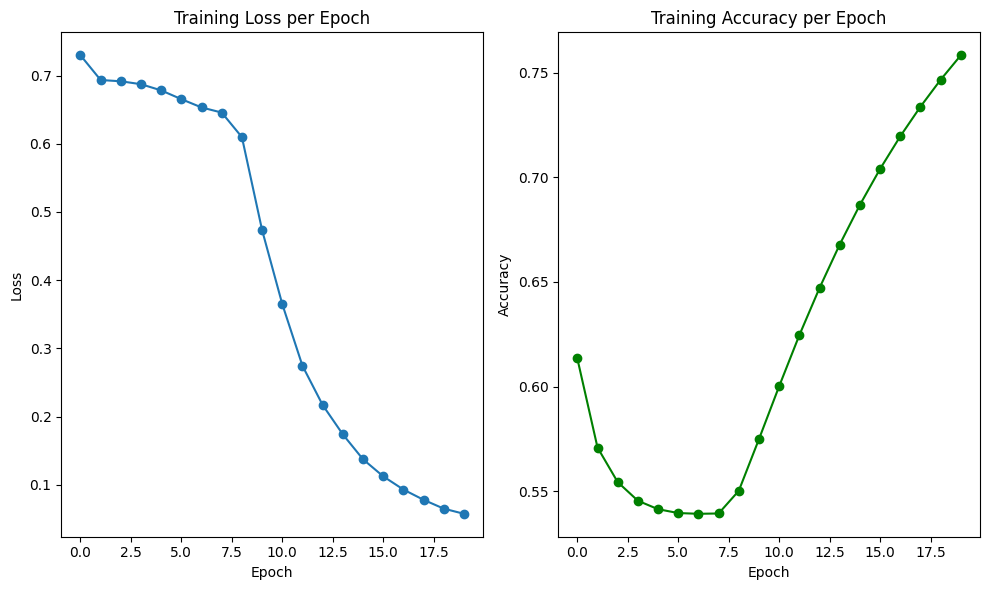

In [ ]:
# Load AG News dataset
print("Loading AG News dataset...")
dataset = load_dataset("ag_news")

# TODO: Extract train and test splits
# - Process the data
# - Define LSTM model
# - Train the model
print(dataset.keys())
train_dataset = dataset["train"]
test_dataset = dataset["test"]

X_train = train_dataset["text"]
y_train = train_dataset["label"]
X_test = test_dataset["text"]
y_test = test_dataset["label"]

print(X_train[0])
print(y_train[0])

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', "", text)
    words = text.split()
    return words

class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=1, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 4)


    def forward(self, x):
        embedded = self.embedding(x)
        rnn_out, hidden = self.rnn(embedded)
        last_hidden = rnn_out[:, -1, :]
        outputs = self.fc(last_hidden)
        return outputs

# Initialize Model
model = LSTM(len(vocab), EMBEDDING_DIM, HIDDEN_DIM).to(device)

# TODO: Define a good Loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),LEARNING_RATE)

# Training Loop
print("Training model.")

train_losses = []
train_accuracies = []


for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # TODO: Implement the training step
        # - Reset the optimizer's gradients
        # - Forward pass: compute model predictions
        # - Compute the loss using the criterion
        # - Backpropagate the loss
        # - Update model parameters using the optimizer
        # - Accumulate the loss for tracking the epoch's loss
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.long())
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        preds = torch.argmax(outputs, dim=1)
        correct += (preds == batch_y).sum().item()
        total += batch_y.size(0)

    avg_loss = epoch_loss / len(train_loader)
    avg_acc = correct / total

    train_losses.append(avg_loss)
    train_accuracies.append(avg_acc)

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss/len(train_loader):.4f}")


# Evaluation
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        predictions = torch.argmax(outputs,dim=1)
        y_true.extend(batch_y.cpu().numpy())
        y_pred.extend(predictions.cpu().numpy())

# Compute Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Achieve at least 80% accuracy
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(train_losses, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(train_accuracies, marker='o', color='green')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

# Part 4: Grid Search of Hyperparameters

In this assignment, you will use the grid search approach to find the best hyperparameters for the LSTM model on AG News from the above assignment.

In [ ]:
from torch.utils.data import Dataset, DataLoader


# TODO: Define a hyperparameter grid
param_grid = {
    'num_cells': [1,2],
    'hidden_dim': [32,64],
    'batch size': [16,32],
    'number of epochs': [5,20],
    'learningrate':[0.001, 0.01]
}

# TODO: Create a validation dataset (split from the training set)
X_train, X_val, y_train, y_val = train_test_split(
  X_train_tensor,
  y_train_tensor,
  test_size=0.2,
  random_state=42,
  stratify=y_train_tensor
)
X_train = X_train.clone().long()
X_val   = X_val.clone().long()
y_train = y_train.clone().long()
y_val   = y_val.clone().long()

In [ ]:
class AGNewsDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# TODO: Train and evaluate the model by searching hyperparameters within the grid, and record the best scores and the corresponding hyperparameters
best_accuracy = 0
best_params = {}
results_list = []
for num_cells in param_grid['num_cells']:
    for hidden_dim in param_grid['hidden_dim']:
      for batch_size in param_grid['batch size']:
        for num_epochs in param_grid['number of epochs']:
          for learning_rate in param_grid['learningrate']:
            print(f"Testing config: cells={num_cells}, hidden_dim={hidden_dim}, "f"batch_size={batch_size}, epochs={num_epochs}, lr={learning_rate}")

            # DataLoaders for this batch size
            train_loader = DataLoader(
            AGNewsDataset(X_train, y_train),
            batch_size=batch_size,
            shuffle=True)
            val_loader = DataLoader(
            AGNewsDataset(X_val, y_val),
            batch_size=batch_size,
            shuffle=False)

            # Create a fresh model for each config
            model = LSTM(
            vocab_size=len(vocab),
            embedding_dim=EMBEDDING_DIM,
            hidden_dim=hidden_dim,
           ).to(device)

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=learning_rate)

            # Train
            for epoch in range(num_epochs):
                model.train()
                for X_batch, y_batch in train_loader:
                    X_batch = X_batch.to(device)
                    y_batch = y_batch.to(device)

                    optimizer.zero_grad()
                    outputs = model(X_batch)
                    loss = criterion(outputs, y_batch)
                    loss.backward()
                    optimizer.step()


            # Evaluate
            model.eval()
            correct = 0
            total = 0
            with torch.no_grad():
                for X_batch, y_batch in val_loader:
                    X_batch = X_batch.to(device)
                    y_batch = y_batch.to(device)

                    outputs = model(X_batch)
                    preds = torch.argmax(outputs, dim=1)
                    correct += (preds == y_batch).sum().item()
                    total += y_batch.size(0)

            val_accuracy = correct / total
            print(f"Validation accuracy: {val_accuracy:.4f}")

            # Save this result into results_list
            results_list.append({
                 'hidden_dim': hidden_dim,
                 'learningrate': learning_rate,
                 'val_accuracy': val_accuracy,
                 'num_cells': num_cells,
                 'batch_size': batch_size,
                 'epochs': num_epochs
            })
            # Track best
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_params = {
                    'num_cells': num_cells,
                    'hidden_dim': hidden_dim,
                    'batch size': batch_size,
                    'number of epochs': num_epochs,
                    'learningrate': learning_rate
                }
                print(">>> New best found!", best_params, "acc =", best_accuracy)

print("\nBest validation accuracy:", best_accuracy)
print("Best hyperparameters:", best_params)


Testing config: cells=1, hidden_dim=32, batch_size=16, epochs=5, lr=0.001
Validation accuracy: 0.8542
>>> New best found! {'num_cells': 1, 'hidden_dim': 32, 'batch size': 16, 'number of epochs': 5, 'learningrate': 0.001} acc = 0.8542
Testing config: cells=1, hidden_dim=32, batch_size=16, epochs=5, lr=0.01
Validation accuracy: 0.5768
Testing config: cells=1, hidden_dim=32, batch_size=16, epochs=20, lr=0.001
Validation accuracy: 0.8598
>>> New best found! {'num_cells': 1, 'hidden_dim': 32, 'batch size': 16, 'number of epochs': 20, 'learningrate': 0.001} acc = 0.8598
Testing config: cells=1, hidden_dim=32, batch_size=16, epochs=20, lr=0.01
Validation accuracy: 0.6374
Testing config: cells=1, hidden_dim=32, batch_size=32, epochs=5, lr=0.001
Validation accuracy: 0.8312
Testing config: cells=1, hidden_dim=32, batch_size=32, epochs=5, lr=0.01
Validation accuracy: 0.6406
Testing config: cells=1, hidden_dim=32, batch_size=32, epochs=20, lr=0.001
Validation accuracy: 0.8590
Testing config: cells

In [ ]:
# TODO: Train the model using the parameter values which achieved the highest scores
# Combine train + val into one training set
X_best = torch.cat([X_train, X_val], dim=0)
y_best = torch.cat([y_train, y_val], dim=0)

best_batch_size = best_params['batch size']
best_hidden_dim = best_params['hidden_dim']
best_epochs     = best_params['number of epochs']
best_lr         = best_params['learningrate']

print("Retraining final model with best hyperparameters:")
print(best_params)

# DataLoaders using best batch size
best_train_loader = DataLoader(
    AGNewsDataset(X_best, y_best),
    batch_size=best_batch_size,
    shuffle=True
)

test_loader = DataLoader(
    AGNewsDataset(X_test_tensor, y_test_tensor),
    batch_size=best_batch_size,
    shuffle=False
)

# New model using best hidden_dim
final_model = LSTM(
    vocab_size=len(vocab),
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=best_hidden_dim
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_lr)

# Train final model
final_model.train()
for epoch in range(best_epochs):
    epoch_loss = 0.0
    correct = 0
    total = 0

    for X_batch, y_batch in best_train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        outputs = final_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

    avg_loss = epoch_loss / len(best_train_loader)
    train_acc = correct / total
    print(f"[Final Training] Epoch {epoch+1}/{best_epochs}, Loss: {avg_loss:.4f}, Acc: {train_acc:.4f}")

# Evaluate on test set
final_model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        outputs = final_model(X_batch)
        preds = torch.argmax(outputs, dim=1)

        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

test_accuracy = accuracy_score(y_true, y_pred)
test_precision = precision_score(y_true, y_pred, average='macro')
test_recall = recall_score(y_true, y_pred, average='macro')

print("\nFinal Model Performance on Test Set:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision (macro): {test_precision:.4f}")
print(f"Test Recall (macro): {test_recall:.4f}")


Retraining final model with best hyperparameters:
{'num_cells': 2, 'hidden_dim': 64, 'batch size': 16, 'number of epochs': 5, 'learningrate': 0.001}
[Final Training] Epoch 1/5, Loss: 0.7022, Acc: 0.5009
[Final Training] Epoch 2/5, Loss: 0.6946, Acc: 0.5100
[Final Training] Epoch 3/5, Loss: 0.6905, Acc: 0.5138
[Final Training] Epoch 4/5, Loss: 0.6749, Acc: 0.5328
[Final Training] Epoch 5/5, Loss: 0.3994, Acc: 0.8323

Final Model Performance on Test Set:
Test Accuracy: 0.8509
Test Precision (macro): 0.8510
Test Recall (macro): 0.8509


Columns in df_results: ['hidden_dim', 'learningrate', 'val_accuracy', 'num_cells', 'batch_size', 'epochs']
   hidden_dim  learningrate  val_accuracy  num_cells  batch_size  epochs
0          32         0.001        0.8542          1          16       5
1          32         0.010        0.5768          1          16       5
2          32         0.001        0.8598          1          16      20
3          32         0.010        0.6374          1          16      20
4          32         0.001        0.8312          1          32       5


/tmp/ipython-input-3330266370.py:15: FutureWarning: The provided callable <function mean at 0x785721340220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = df_results.pivot_table(


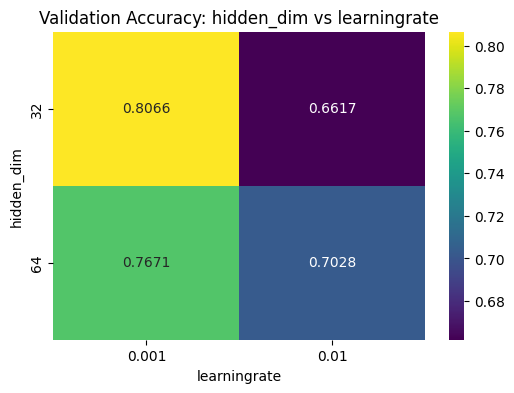

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Convert results into a DataFrame
df_results = pd.DataFrame(results_list)
print("Columns in df_results:", df_results.columns.tolist())
print(df_results.head())

if df_results.empty:
    print("df_results is empty. Make sure you ran the grid search cell and results_list is being filled.")
else:
    # Pivot table for heatmap: hidden_dim vs learningrate
    pivot_table = df_results.pivot_table(
        values="val_accuracy",
        index="hidden_dim",
        columns="learningrate",
        aggfunc=np.mean
    )

    # Plot heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".4f",
        cmap="viridis"
    )
    plt.title("Validation Accuracy: hidden_dim vs learningrate")
    plt.xlabel("learningrate")
    plt.ylabel("hidden_dim")
    plt.show()
